                                Mateus Veloso dos Santos
                                Student ID: 4400089708
                                mateus.16.veloso@gmail.com
                                Data Science Institute - Applied Statistics
                                Sept-25 PGD Comp Sci AI/ML

        M2 ASSIGNMENT 3

    Binary Logistic Regression

    BACKGROUND: This is Data for a Study of Risk Factors Associated with Low Infant Birth Weight. Data were collected at Baystate Medical Center, Springfield, Massachusetts, during 1986.

    Description of variables -

    LOW – Low Birth Weight (0 means Not low and 1 means low)

    AGE- Age of the Mother in Years

    LWT- Weight in Pounds at the Last Menstrual Period

    RACE- Race (1 = White, 2 = Black, 3 = Other)

    SMOKE- Smoking Status During Pregnancy (1 = Yes, 0 = No)

    PTL- History of Premature Labor (0 = None, 1 = One, etc.)

    HT- History of Hypertension (1 = Yes, 0 = No)

    UI- Presence of Uterine Irritability (1 = Yes, 0 = No)

    FTV- Number of Physician Visits During the First Trimester (0 = None, 1 = One, 2 = Two, etc.)

    

    Consider LOW as dependent variable and remaining variables listed above as independent variables.

    

    QUESTIONS-

    

    Import BIRTH WEIGHT data.
    Cross tabulate dependent variable with each independent variable.
    Develop a model to predict if birth weight is low or not using the given variables.
    Generate three classification tables with cut-off values 0.4, 0.3 and 0.55.
    Calculate sensitivity and specificity and misclassification rate for all three tables above. What is the recommended cut-off value?
    Obtain ROC curve and report area under curve.

Number 1

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy as pt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv("BIRTH_WEIGHT.csv")

df = df[['LOW','AGE','LWT','RACE','SMOKE','PTL','HT','UI','FTV']]

categorical_vars = ['RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'FTV']

for var in categorical_vars:
    print(f'\nLOW vs {var}')
    print(pd.crosstab(df['LOW'], df[var]))


LOW vs RACE
RACE   1   2   3
LOW             
0     73  15  42
1     23  11  25

LOW vs SMOKE
SMOKE   0   1
LOW          
0      86  44
1      29  30

LOW vs PTL
PTL    0   1  2  3
LOW               
0    118   8  3  1
1     41  16  2  0

LOW vs HT
HT     0  1
LOW        
0    125  5
1     52  7

LOW vs UI
UI     0   1
LOW         
0    117  13
1     45  14

LOW vs FTV
FTV   0   1   2  3  4  6
LOW                     
0    64  36  23  3  3  1
1    36  11   7  4  1  0


Number 2

In [21]:
y, X = pt.dmatrices(
    'LOW ~ AGE + LWT + C(RACE) + SMOKE + PTL + HT + UI + FTV',
    df,
    return_type = 'dataframe'
)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.531508
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    LOW   No. Observations:                  189
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.1439
Time:                        18:44:07   Log-Likelihood:                -100.45
converged:                       True   LL-Null:                       -117.34
Covariance Type:            nonrobust   LLR p-value:                 9.832e-05
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4428      1.198      0.370      0.712      -1.906       2.792
C(RACE)[T.2]     1.2935

Number 3

In [51]:
df['P_LOW'] = result.predict(X)
df[['LOW', 'P_LOW']].head()

,LOW,P_LOW
0,0,0.171549
1,0,0.140005
2,0,0.322097
3,0,0.518443
4,0,0.513538


Number 4

In [53]:
def classification_table(y_true, y_prob, cutoff):
    y_pred = (y_prob >= cutoff).astype(int)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 00))

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    misclassification = (fp + fn) / (tp + tn + fp +fn)

    return {
        'Cutoff' : cutoff,
        'Sensitivity' : round(sensitivity, 3),
        'Specificity': round(specificity, 3),
        'Misclassification Rate': round(misclassification, 3)
    }

y_true = df['LOW']

results = [classification_table(y_true, df['P_LOW'], c) for c in [0.3, 0.4, 0.55]]
pd.DataFrame(results)

,Cutoff,Sensitivity,Specificity,Misclassification Rate
0,0.30,0.678,0.669,0.328
1,0.40,0.475,0.823,0.286
2,0.55,0.288,0.923,0.275


Number 5.

        The best cut-off value is 0.40, as it offers a good balance between sensitivity (0.475) and specificity (0.823),
        with a low misclassification rate (0.286). This threshold provides reliable overall accuracy while still identifying most low birth weight cases.


Number 6

AUC: 0.7490221642764016


<function matplotlib.pyplot.show(close=None, block=None)>

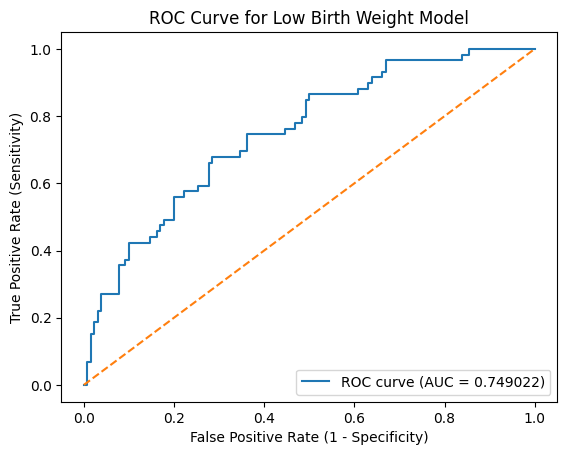

In [55]:
fpr, tpr, threshold = roc_curve(y_true, df['P_LOW'])
auc = roc_auc_score(y_true, df['P_LOW'])
print('AUC:', auc)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:3f})')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Low Birth Weight Model')
plt.legend(loc='lower right')
plt.show

        The ROC curve shows reasonable discrimination, with an area under de curve of approximately 0.75, 
        indicating that the model has good ability to distinguish between low and normal birth weight infants.

    -- Report --

    Method

    The dataset has 189 records.
    Variables used:
        Dependent variable: LOW
        Independent variables: AGE, LWT, RACE, SMOKE, PTL, HT, UI, and FTV

    First, I created cross-tabulations between LOW and each independent variable to see basic patterns. Then, I built 
    a logistic regression model using these predictors. The model was used to calculate the probability of a low birth 
    weight for each case, and three different cut-off values (0.3, 0.4, 0.55) were tested to compare sensitivity, 
    specificity, and misclassification rates. Finally, I plotted the ROC curve and calculated the area under the curve (AUC).


    Results

        Cross-tabulations showed that smoking, hypertension, and lower maternal weight were associated with higher chances of low birth weight.
        The logistic regression identified race, smoking, low weight (LWT), and hypertension (HT) as significant predictors (p < 0.05).

In [61]:
data = {
    'Cut-off': [0.30, 0.40, 0.55],
    'Sensitivity': [0.678, 0.475, 0.288],
    'Specificity': [0.669, 0.823, 0.923],
    'Misclassification Rate': [0.328, 0.286, 0.275]
}

table = pd.DataFrame(data)
print(table)

   Cut-off  Sensitivity  Specificity  Misclassification Rate
0     0.30        0.678        0.669                   0.328
1     0.40        0.475        0.823                   0.286
2     0.55        0.288        0.923                   0.275


    The AUC was 0.75, showing that the model has a good ability to separate low from normal birth weight outcomes.

    Conclusion

    The best cut-off point is 0.40 because it gives a good balance between sensitivity (0.475) and specificity (0.823), 
    with a low error rate (0.286). It keeps the model accurate while still identifying most of the low-weight cases. 
    Overall, the model performs well for this kind of medical data and can help highlight the main risk factors for low 
    infant birth weight.